In [15]:
# Cell 1: Setup
import json
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

print("✓ Imports successful")

✓ Imports successful


In [2]:
data_path = '../data/arxiv-metadata-oai-snapshot.json'

# Read first 5 records to understand structure
sample_records = []
with open(data_path, "r") as f:
    for i, line in enumerate(f):
        if i >= 5:
            break
        record = json.loads(line)
        sample_records.append(record)

# Display first record structure
print("First record keys:", sample_records[0].keys())
print("\n" + "="*50)
print("Sample record:")
print(json.dumps(sample_records[0], indent=2))

First record keys: dict_keys(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed'])

Sample record:
{
  "id": "0704.0001",
  "submitter": "Pavel Nadolsky",
  "authors": "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  "title": "Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies",
  "comments": "37 pages, 15 figures; published version",
  "journal-ref": "Phys.Rev.D76:013009,2007",
  "doi": "10.1103/PhysRevD.76.013009",
  "report-no": "ANL-HEP-PR-07-12",
  "categories": "hep-ph",
  "license": null,
  "abstract": "  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resum

In [ ]:
# Cell 3: Check what fields we have
print("Available fields:")
for key in sample_records[0].keys():
    print(f"  - {key}")

In [4]:
# Cell 4: Extract 100K abstracts with metadata
print("Extracting 100K abstracts...")

abstracts_data = []
target_count = 100_000

with open(data_path, 'r') as f:
    for i, line in enumerate(f):
        if len(abstracts_data) >= target_count:
            break
        try:
            record = json.loads(line)

            abstract = record.get('abstract', ' ').strip()

            if abstract:
                abstracts_data.append({
                    'id': record['id'],
                    'title': record['title'].replace('\n', ' '),
                    'abstract': abstract.replace('\n', ' '),
                    'categories': record['categories']
                })
        except:
            continue

        # Progress indicator
        if (i + 1) % 10000 == 0:
            print(f"  Processed {i+1:,} records, collected {len(abstracts_data):,} abstracts")

print(f"\n✓ Extracted {len(abstracts_data):,} abstracts")

Extracting 100K abstracts...
  Processed 10,000 records, collected 10,000 abstracts
  Processed 20,000 records, collected 20,000 abstracts
  Processed 30,000 records, collected 30,000 abstracts
  Processed 40,000 records, collected 40,000 abstracts
  Processed 50,000 records, collected 50,000 abstracts
  Processed 60,000 records, collected 60,000 abstracts
  Processed 70,000 records, collected 70,000 abstracts
  Processed 80,000 records, collected 80,000 abstracts
  Processed 90,000 records, collected 90,000 abstracts
  Processed 100,000 records, collected 100,000 abstracts

✓ Extracted 100,000 abstracts


In [11]:
# Cell 5: Basic statistics
df = pd.DataFrame(abstracts_data)
df.head()

,id,title,abstract,categories
0,0704.0001,Calculation of prompt diphoton production cros...,A fully differential calculation in perturbati...,hep-ph
1,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pe...",math.CO cs.CG
2,0704.0003,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is describe...,physics.gen-ph
3,0704.0004,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle n...,math.CO
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\Lam...,math.CA math.FA


In [12]:
print("Dataset Statistics:")
print(f"  Total abstracts: {len(df):,}")
print(f"\nAbstract length statistics (characters):")
df['abstract_length'] = df['abstract'].str.len()
print(df['abstract_length'].describe())

print(f"\nSample abstract:")
print(f"ID: {df.iloc[0]['id']}")
print(f"Title: {df.iloc[0]['title']}")
print(f"Abstract: {df.iloc[0]['abstract'][:200]}...")

Dataset Statistics:
  Total abstracts: 100,000

Abstract length statistics (characters):
count    100000.000000
mean        796.475910
std         402.057728
min          17.000000
25%         503.000000
50%         723.000000
75%        1036.000000
max        2861.000000
Name: abstract_length, dtype: float64

Sample abstract:
ID: 0704.0001
Title: Calculation of prompt diphoton production cross sections at Tevatron and   LHC energies
Abstract: A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. All next-to-leading order perturbative contribution...


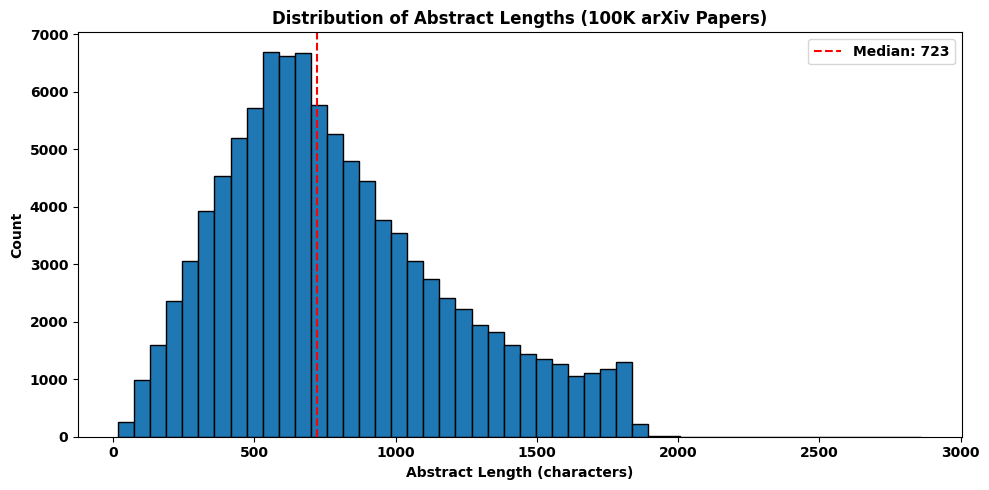

✓ Saved visualization to docs/abstract_length_distribution.png


In [13]:
# Cell 6: Visualize abstract lengths
plt.figure(figsize=(10, 5))
plt.hist(df['abstract_length'], bins=50, edgecolor='black')
plt.xlabel('Abstract Length (characters)')
plt.ylabel('Count')
plt.title('Distribution of Abstract Lengths (100K arXiv Papers)')
plt.axvline(df['abstract_length'].median(), color='red', linestyle='--', label=f'Median: {df["abstract_length"].median():.0f}')
plt.legend()
plt.tight_layout()
plt.savefig('../docs/abstract_length_distribution.png', dpi=150)
plt.show()
print("✓ Saved visualization to docs/abstract_length_distribution.png")

In [16]:
# Cell 7: Save cleaned dataset
output_path = '../data/arxiv_100k_abstracts.json'
df.to_json(output_path, orient='records', lines=True)
print(f"✓ Saved 100K abstracts to {output_path}")
print(f"  File size: {os.path.getsize(output_path)}")

✓ Saved 100K abstracts to ../data/arxiv_100k_abstracts.json
  File size: 96511154
